In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions

In [3]:
file_path=r"C:\Users\as\OneDrive\Desktop\flight price prediction\data\train.csv"
train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-03-06,Delhi,Cochin,12:30:00,09:25:00,1255,1.0,No Info,13832
1,Jet Airways,2019-06-06,Delhi,Cochin,15:00:00,04:25:00,805,1.0,In-flight meal not included,10262
2,Air India,2019-05-09,Kolkata,Banglore,16:50:00,07:55:00,905,1.0,No Info,8366
3,Jet Airways,2019-03-21,Banglore,New Delhi,09:45:00,15:55:00,370,1.0,In-flight meal not included,7280
4,Spicejet,2019-06-21,Chennai,Kolkata,17:45:00,20:05:00,140,0.0,No check-in baggage included,3543
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-04-18,Banglore,Delhi,11:10:00,14:05:00,175,0.0,No Info,7229
636,Air Asia,2019-03-01,Kolkata,Banglore,19:35:00,22:05:00,150,0.0,No Info,5964
637,Indigo,2019-03-27,Chennai,Kolkata,19:35:00,21:55:00,140,0.0,No Info,3858
638,Indigo,2019-03-27,Kolkata,Banglore,15:10:00,17:45:00,155,0.0,No Info,4148


In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train=train.assign(**{
    col:pd.to_datetime(train.loc[:,col],dayfirst=True,format="mixed")
    for col in ["date_of_journey","dep_time","arrival_time"]})
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

# summary of data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,635.914062,0.779687,9322.095312
std,498.206157,0.647538,4501.053274
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5228.000000
50%,520.000000,1.000000,8831.500000
75%,875.000000,1.000000,12692.000000
max,2525.000000,4.000000,27210.000000


In [8]:
(train.assign(total_stops=train["total_stops"].astype(object)).describe(include="O"))

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,5.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,246,252,252,358.0,492


# Missing value

In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


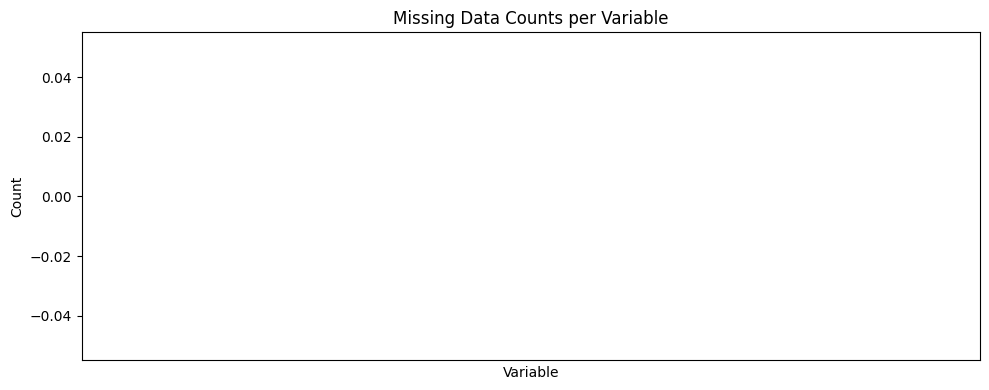

In [10]:
eda_helper_functions.plot_missing_info(train)

# outlier

In [11]:
from sklearn.ensemble import IsolationForest
forest=IsolationForest(n_estimators=10,random_state=42)
(train.assign(outlier=forest.fit_predict(train.drop(columns="price").select_dtypes(include="number"))).query("outlier==-1"))

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Air India,2019-03-06,Delhi,Cochin,2024-11-17 12:30:00,2024-11-17 09:25:00,1255,1.0,No Info,13832,-1
5,Air Asia,2019-06-06,Kolkata,Banglore,2024-11-17 06:50:00,2024-11-17 10:30:00,220,1.0,No Info,6857,-1
6,Jet Airways,2019-05-06,Kolkata,Banglore,2024-11-17 06:30:00,2024-11-17 10:05:00,1655,1.0,In-flight meal not included,8586,-1
9,Jet Airways,2019-06-24,Delhi,Cochin,2024-11-17 14:35:00,2024-11-17 12:35:00,1320,2.0,No Info,13376,-1
10,Indigo,2019-05-09,Delhi,Cochin,2024-11-17 06:50:00,2024-11-17 12:10:00,320,1.0,No Info,5298,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Jet Airways,2019-03-21,Mumbai,Hyderabad,2024-11-17 03:05:00,2024-11-17 04:25:00,80,0.0,In-flight meal not included,2759,-1
627,Jet Airways,2019-03-27,Delhi,Cochin,2024-11-17 11:30:00,2024-11-17 04:25:00,1015,1.0,In-flight meal not included,6017,-1
630,Vistara,2019-03-06,Mumbai,Hyderabad,2024-11-17 20:55:00,2024-11-17 22:55:00,1560,1.0,No Info,12395,-1
632,Jet Airways,2019-05-01,Kolkata,Banglore,2024-11-17 17:00:00,2024-11-17 10:55:00,1075,1.0,No Info,12121,-1


# Pair Plot

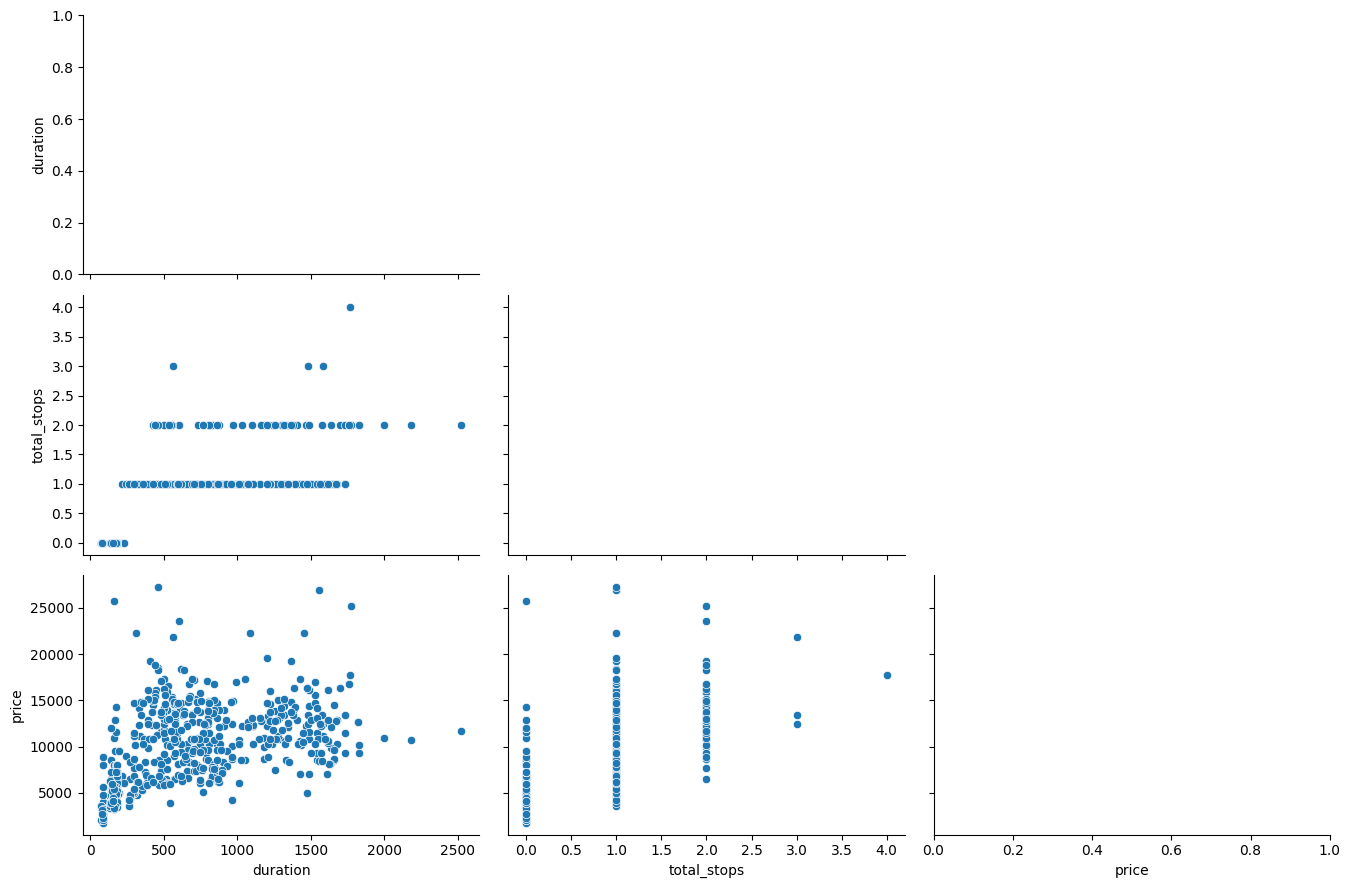

In [12]:
eda_helper_functions.pair_plots(train)

# Correlation

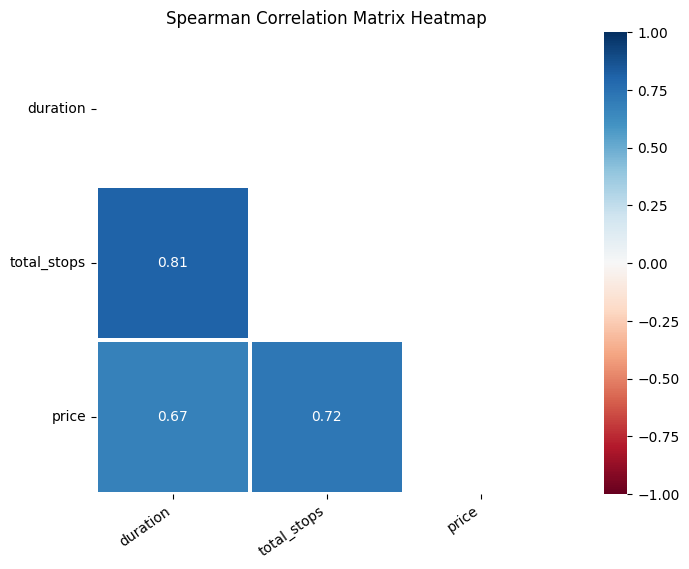

In [13]:
eda_helper_functions.correlation_heatmap(train)

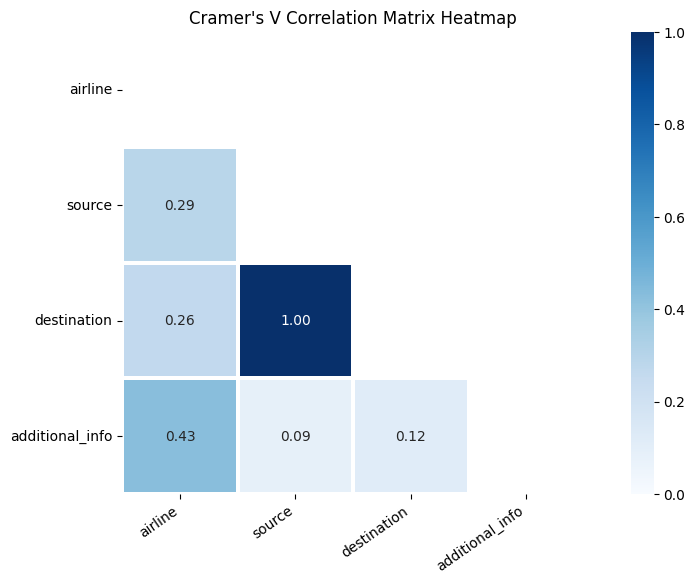

In [14]:
eda_helper_functions.cramersV_heatmap(train)

## Detailed analysis of each features
<!-- summary
univarite analysis
bivariate analysis
hypothesis testing
multivariate plot
missing value ,outlier reason
observation -->

In [15]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

# airline

In [16]:
train.airline

0        Air India
1      Jet Airways
2        Air India
3      Jet Airways
4         Spicejet
          ...     
635    Jet Airways
636       Air Asia
637         Indigo
638         Indigo
639    Jet Airways
Name: airline, Length: 640, dtype: object

In [17]:
eda_helper_functions.cat_summary(train,"airline")

0        Air India
1      Jet Airways
2        Air India
3      Jet Airways
4         Spicejet
          ...     
635    Jet Airways
636       Air Asia
637         Indigo
638         Indigo
639    Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,246


,count,percentage
category,,
Jet Airways,246,0.384375
Indigo,113,0.176563
Air India,99,0.154688
Multiple Carriers,75,0.117188
Spicejet,51,0.079687
Vistara,28,0.043750
Air Asia,16,0.025000
Goair,10,0.015625
Multiple Carriers,2,0.003125


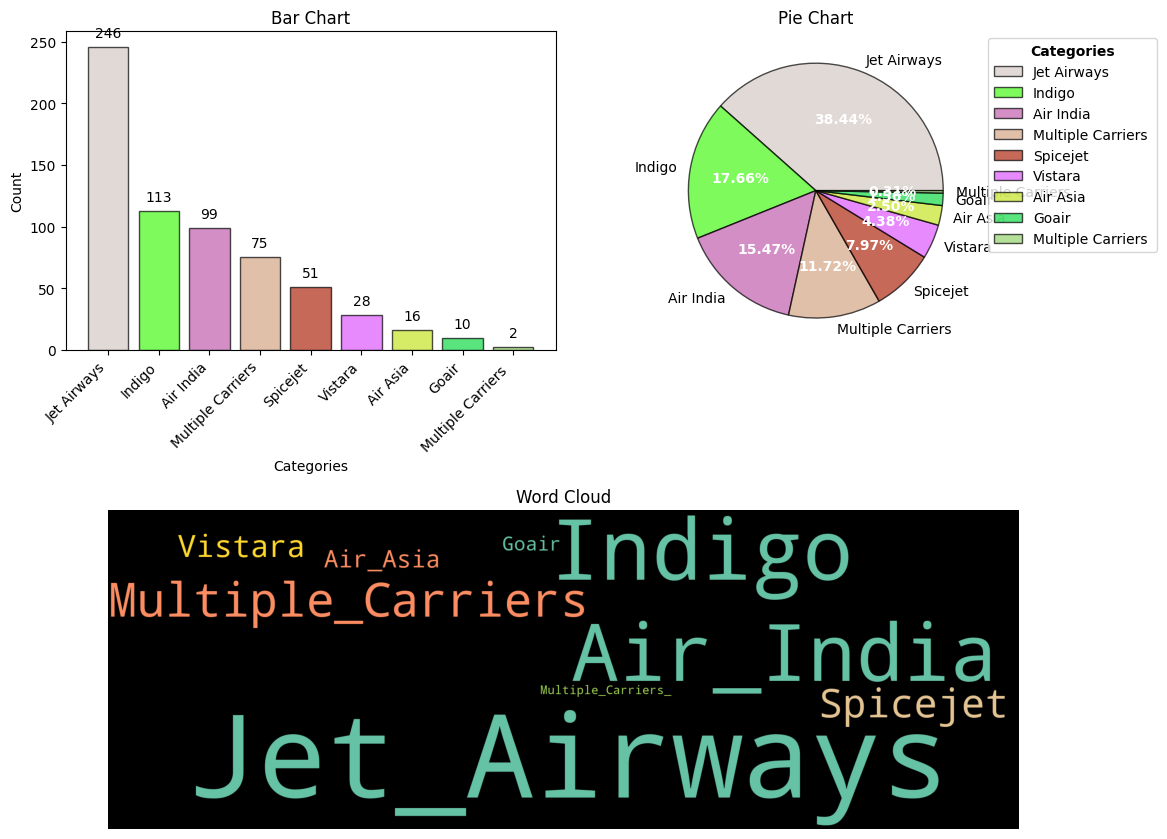

In [18]:
eda_helper_functions.cat_univar_plots(train, "airline")

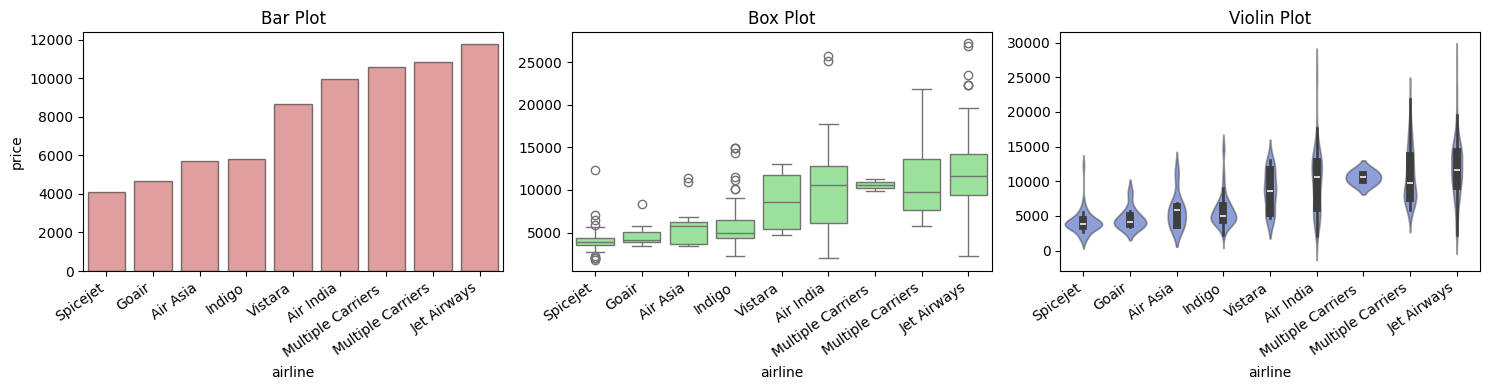

In [19]:
eda_helper_functions.num_cat_bivar_plots(train, num_var="price", cat_var="airline")

In [20]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 48.79973445612648
- p-value              : 3.0827571187622212e-61
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 277.2128940237757
- p-value              : 2.888133356200288e-55
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


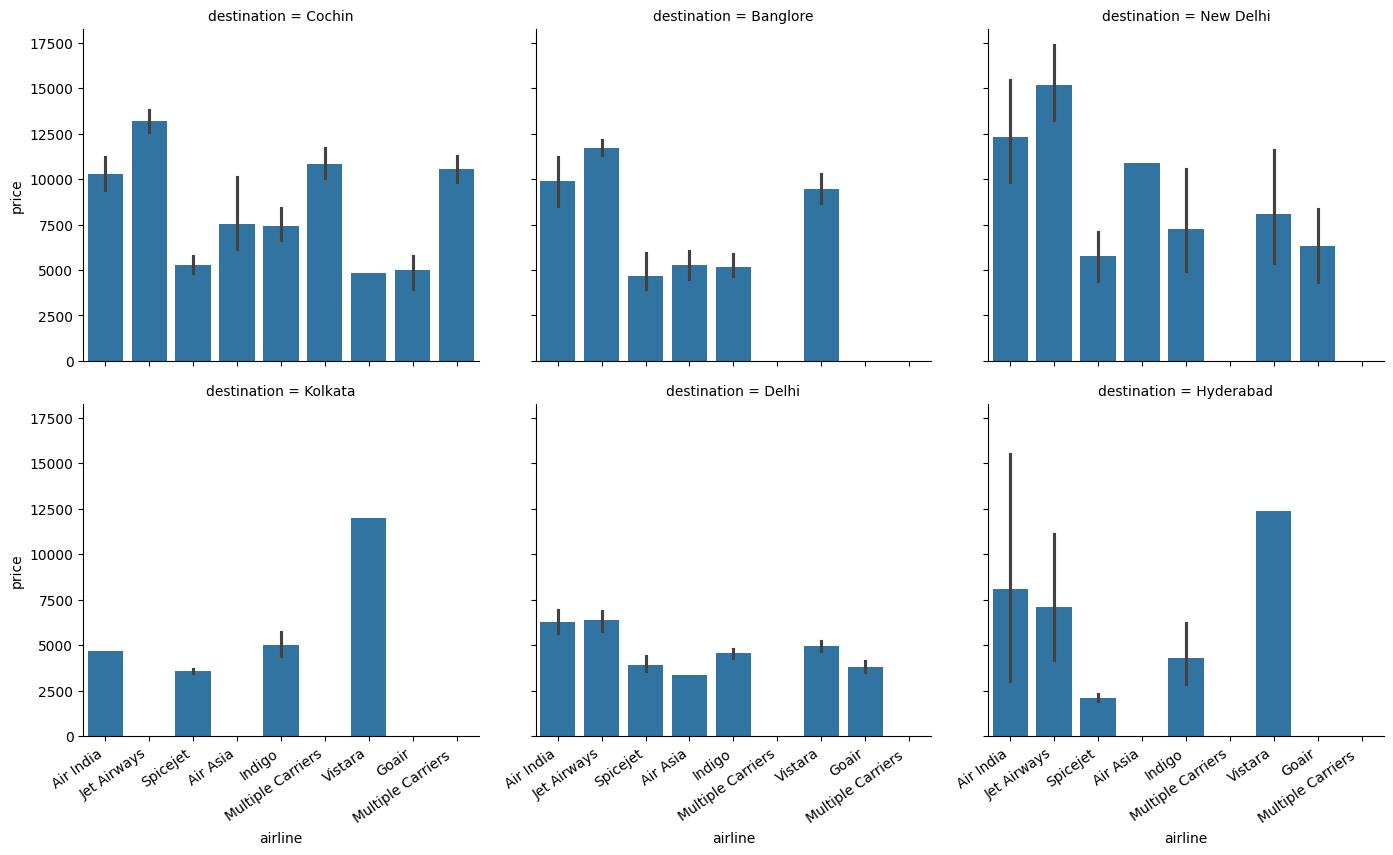

In [21]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

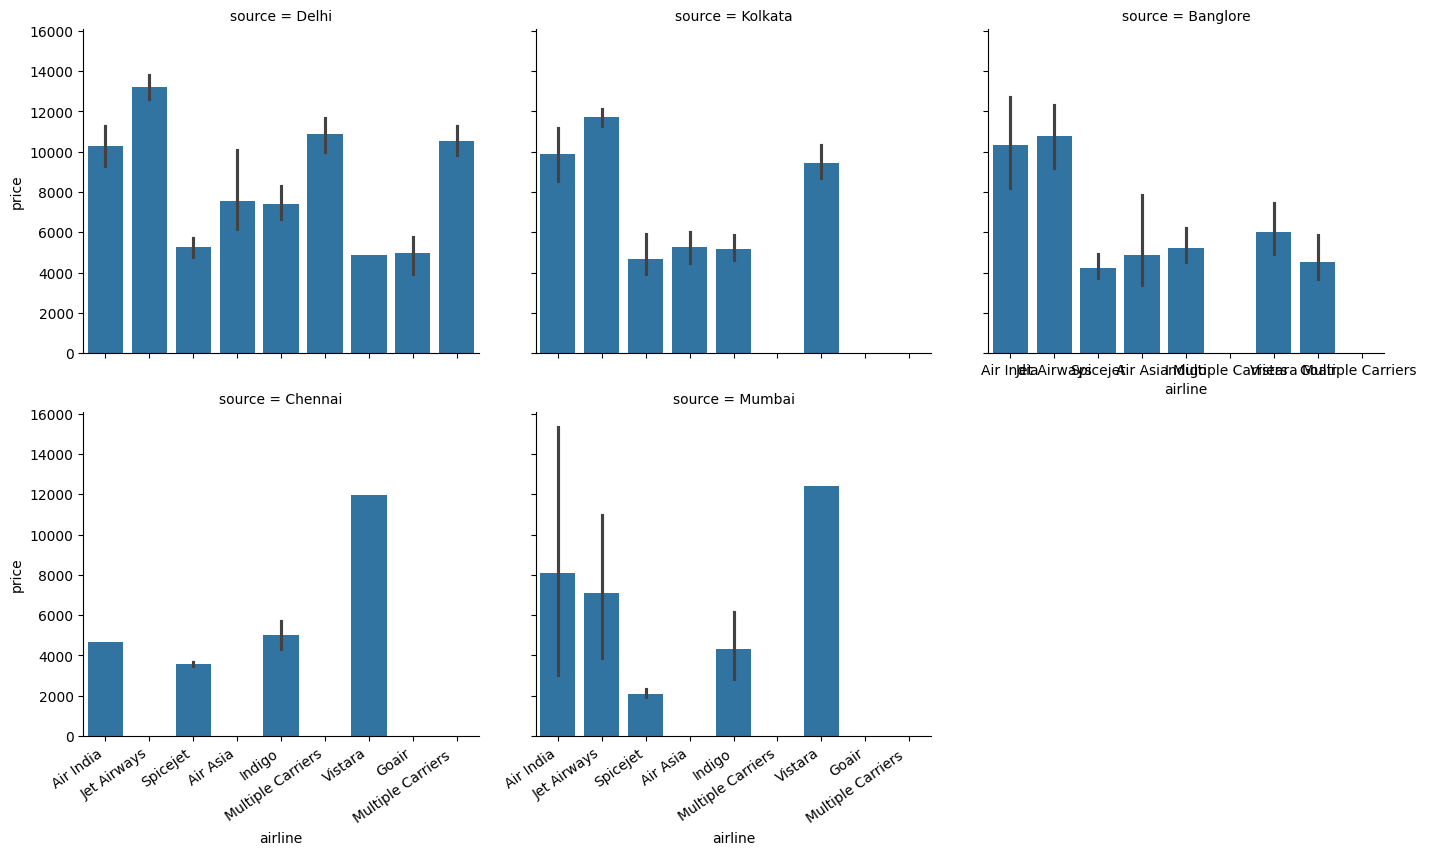

In [22]:
airline_grid = sns.FacetGrid(
	data=train,
	col="source",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

## date of journey

In [23]:
train.date_of_journey

0     2019-03-06
1     2019-06-06
2     2019-05-09
3     2019-03-21
4     2019-06-21
         ...    
635   2019-04-18
636   2019-03-01
637   2019-03-27
638   2019-03-27
639   2019-05-27
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

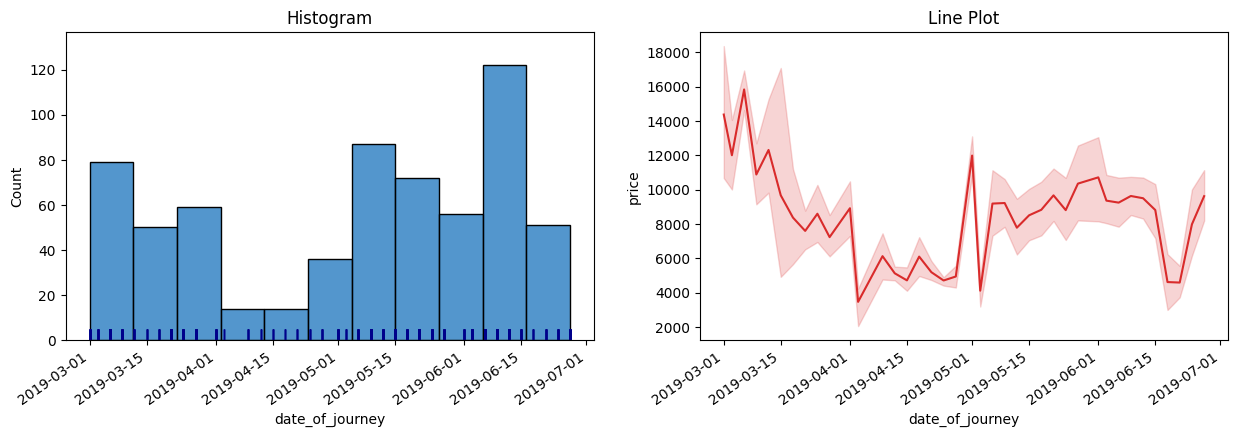

In [24]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price")

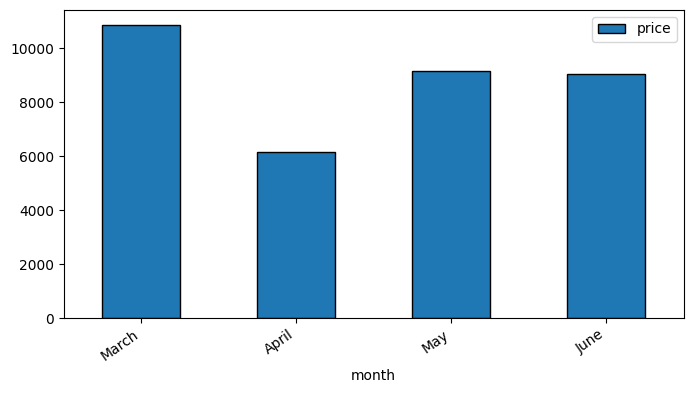

In [25]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

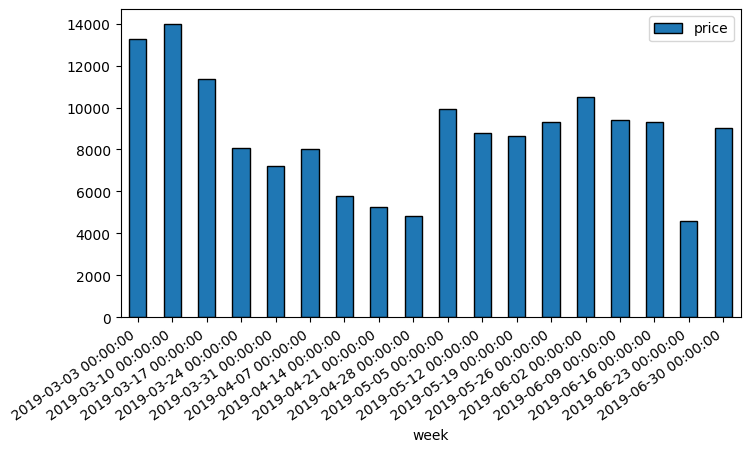

In [26]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

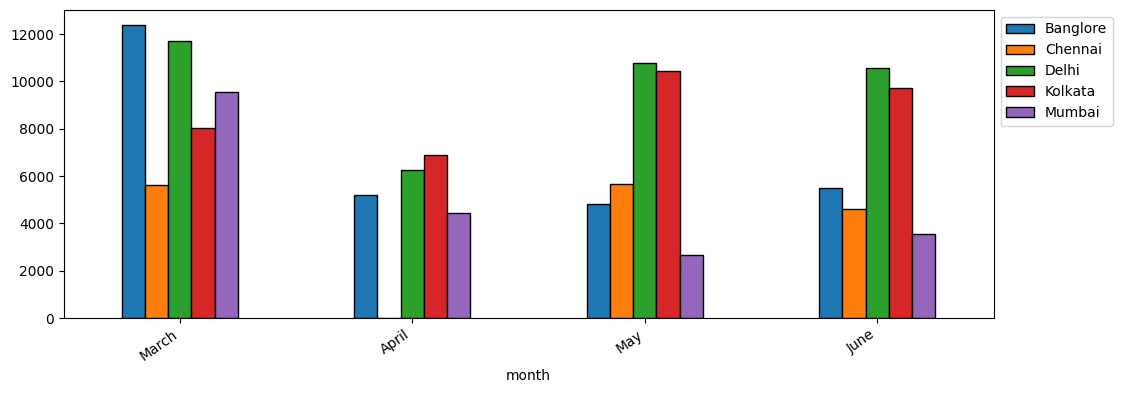

In [27]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

## source

In [28]:
train.source

0         Delhi
1         Delhi
2       Kolkata
3      Banglore
4       Chennai
         ...   
635    Banglore
636     Kolkata
637     Chennai
638     Kolkata
639       Delhi
Name: source, Length: 640, dtype: object

In [29]:
eda_helper_functions.cat_summary(train,"source")

0         Delhi
1         Delhi
2       Kolkata
3      Banglore
4       Chennai
         ...   
635    Banglore
636     Kolkata
637     Chennai
638     Kolkata
639       Delhi
Name: source, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,Delhi
freq,252


,count,percentage
category,,
Delhi,252,0.393750
Kolkata,195,0.304688
Banglore,127,0.198437
Mumbai,34,0.053125
Chennai,32,0.050000


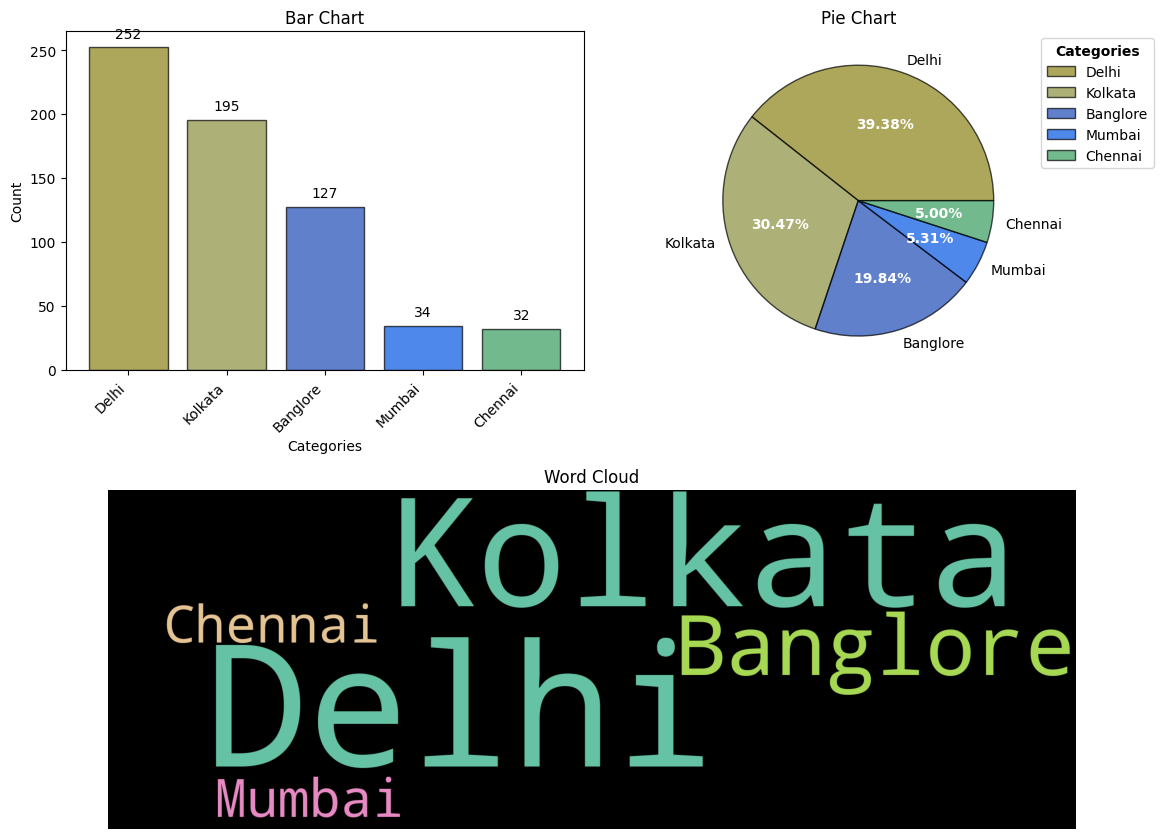

In [30]:
eda_helper_functions.cat_univar_plots(train, "source")

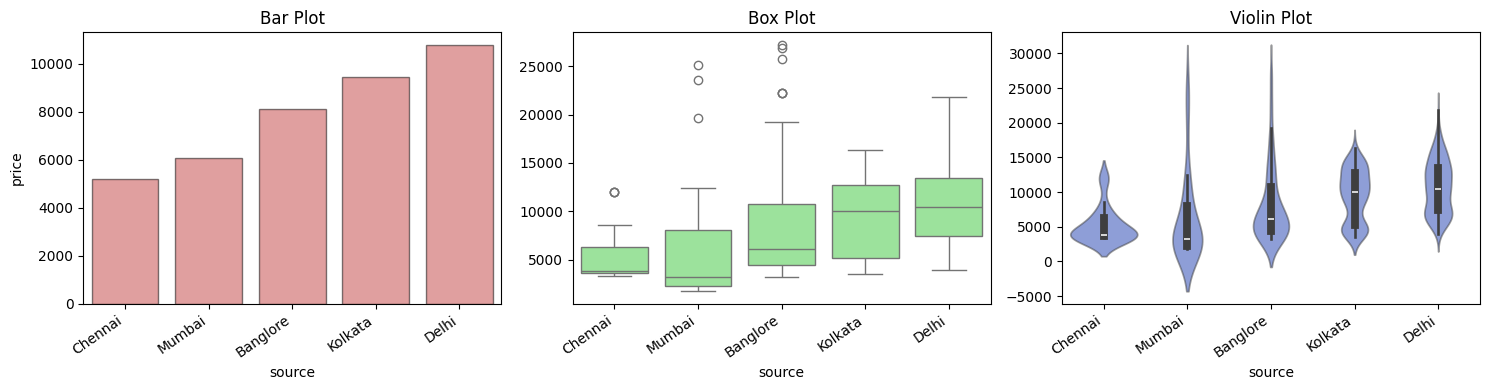

In [31]:
eda_helper_functions.num_cat_bivar_plots(train, num_var="price", cat_var="source")

In [32]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "source")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 22.701330632652294
- p-value              : 1.513886656493567e-17
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 117.54981639152668
- p-value              : 1.7819709261202e-24
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


## Destination

In [34]:
train.destination

0         Cochin
1         Cochin
2       Banglore
3      New Delhi
4        Kolkata
         ...    
635        Delhi
636     Banglore
637      Kolkata
638     Banglore
639       Cochin
Name: destination, Length: 640, dtype: object

In [35]:
eda_helper_functions.cat_summary(train,"destination")

0         Cochin
1         Cochin
2       Banglore
3      New Delhi
4        Kolkata
         ...    
635        Delhi
636     Banglore
637      Kolkata
638     Banglore
639       Cochin
Name: destination, Length: 640, dtype: object

Data Type      : object
Cardinality    : 6 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,6
top,Cochin
freq,252


,count,percentage
category,,
Cochin,252,0.393750
Banglore,195,0.304688
Delhi,75,0.117188
New Delhi,52,0.081250
Hyderabad,34,0.053125
Kolkata,32,0.050000


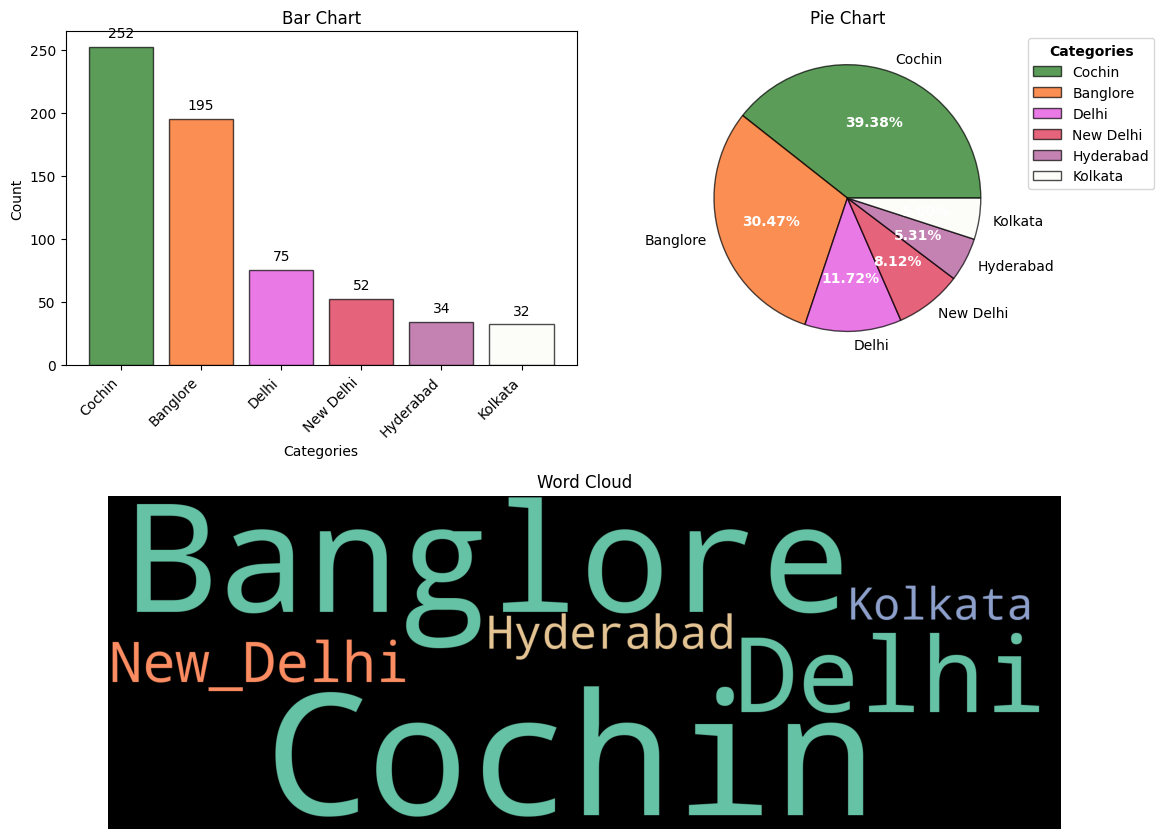

In [36]:
eda_helper_functions.cat_univar_plots(train, "destination")

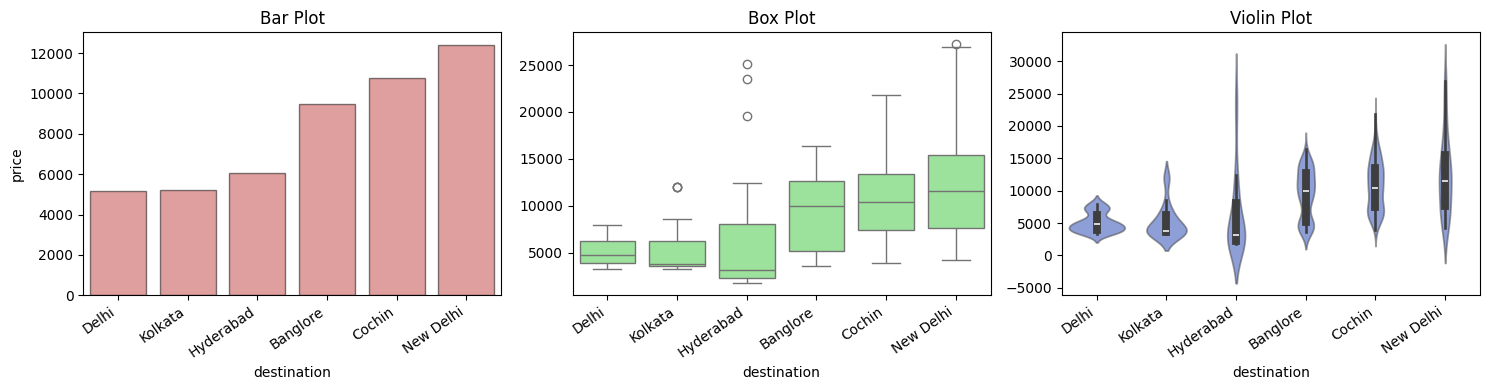

In [37]:
eda_helper_functions.num_cat_bivar_plots(train, num_var="price", cat_var="destination")

In [38]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "destination")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 42.262262125995235
- p-value              : 1.3536735611258941e-37
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 187.9188116645456
- p-value              : 1.0880210692578934e-38
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


## Dep time

In [39]:
train.dep_time

0     2024-11-17 12:30:00
1     2024-11-17 15:00:00
2     2024-11-17 16:50:00
3     2024-11-17 09:45:00
4     2024-11-17 17:45:00
              ...        
635   2024-11-17 11:10:00
636   2024-11-17 19:35:00
637   2024-11-17 19:35:00
638   2024-11-17 15:10:00
639   2024-11-17 16:00:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

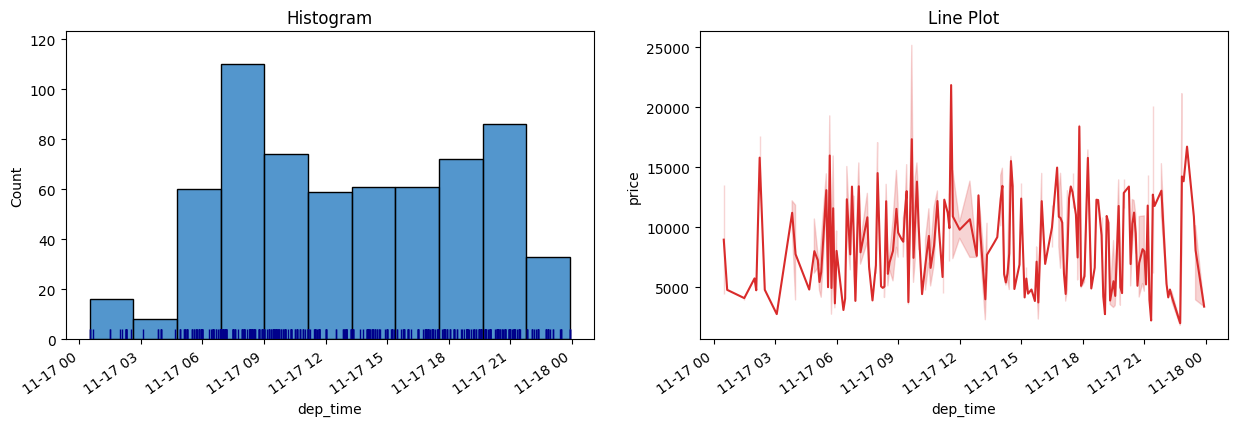

In [40]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

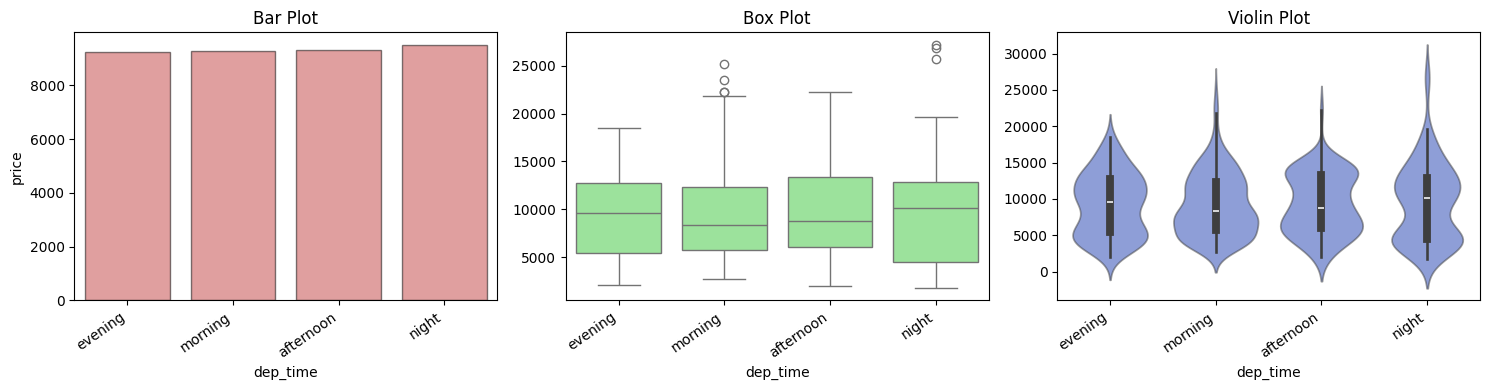

In [66]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

## Arrival_time

In [44]:
train.arrival_time

0     2024-11-17 09:25:00
1     2024-11-17 04:25:00
2     2024-11-17 07:55:00
3     2024-11-17 15:55:00
4     2024-11-17 20:05:00
              ...        
635   2024-11-17 14:05:00
636   2024-11-17 22:05:00
637   2024-11-17 21:55:00
638   2024-11-17 17:45:00
639   2024-11-17 19:00:00
Name: arrival_time, Length: 640, dtype: datetime64[ns]

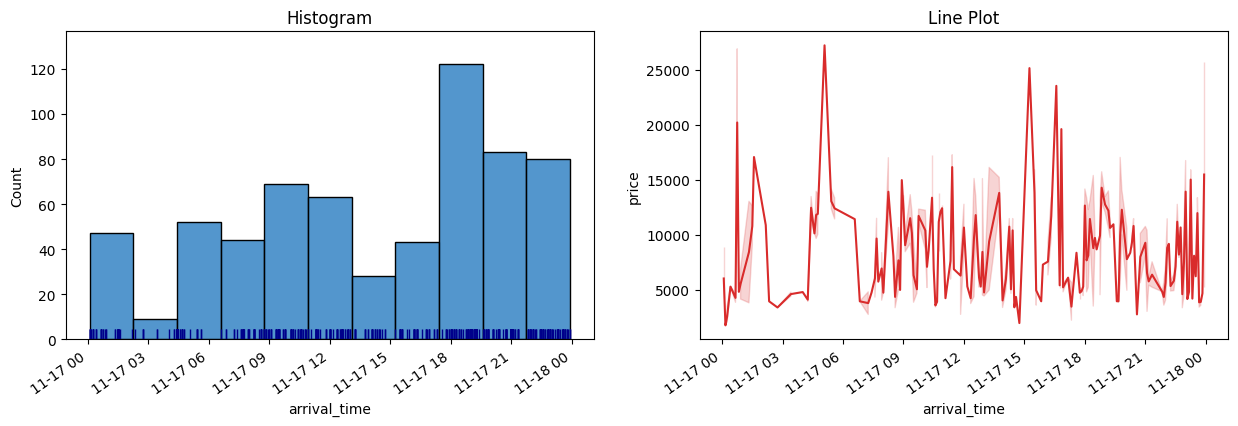

In [45]:
eda_helper_functions.dt_univar_plots(train, "arrival_time", "price")

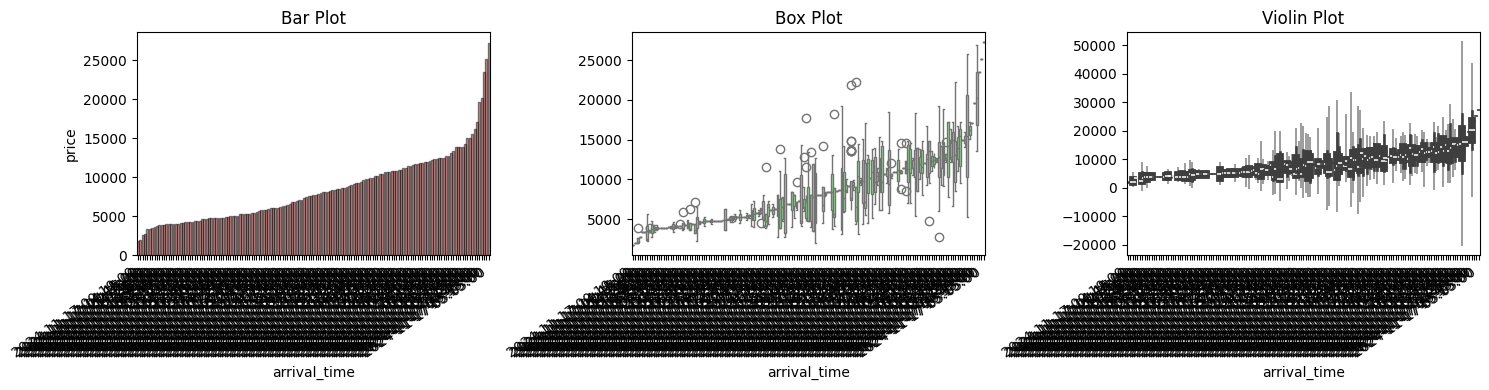

In [68]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.arrival_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.arrival_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.arrival_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "arrival_time")
)

## Duration

In [48]:
train.duration

0      1255
1       805
2       905
3       370
4       140
       ... 
635     175
636     150
637     140
638     155
639    1620
Name: duration, Length: 640, dtype: int64

In [49]:
eda_helper_functions.num_summary(train,"duration")

0      1255
1       805
2       905
3       370
4       140
       ... 
635     175
636     150
637     140
638     155
639    1620
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,135.00
10,149.50
25,170.00
50,520.00
75,875.00
90,1475.50
95,1595.75
99,1802.45


,value
mean,635.914062
trimmed mean (5%),604.427083
trimmed mean (10%),575.234375
median,520.000000


,value
var,248209.374450
std,498.206157
IQR,705.000000
mad,350.000000
coef_variance,0.783449


,value
skewness,0.850224
kurtosis,-0.242714


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.883023409715157e-21
Test Statistic       : 0.8843709671591152
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 24.560514609742768
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


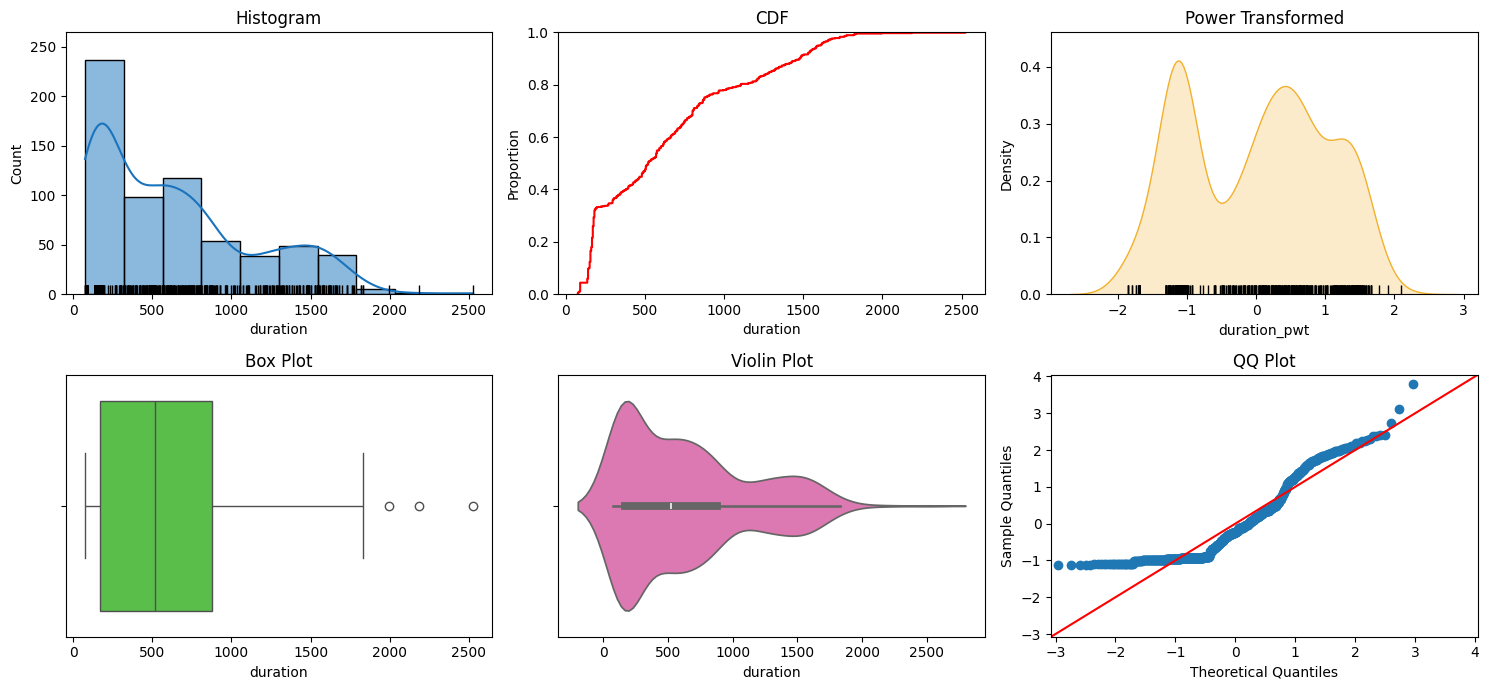

In [50]:
eda_helper_functions.num_univar_plots(train, "duration")

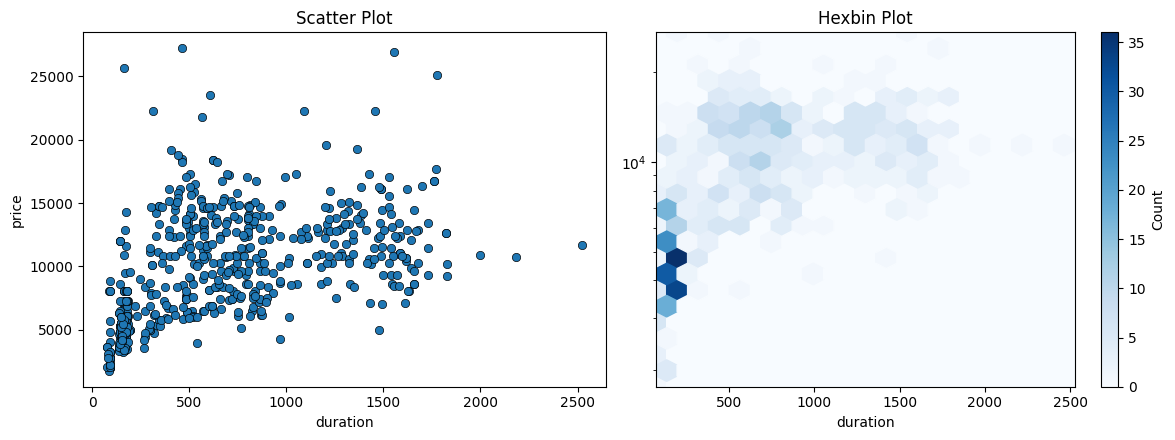

In [51]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [52]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5459911359524353
- p-value              : 5.261933877737624e-51
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6745883338233531
- p-value              : 3.6504657020235935e-86
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


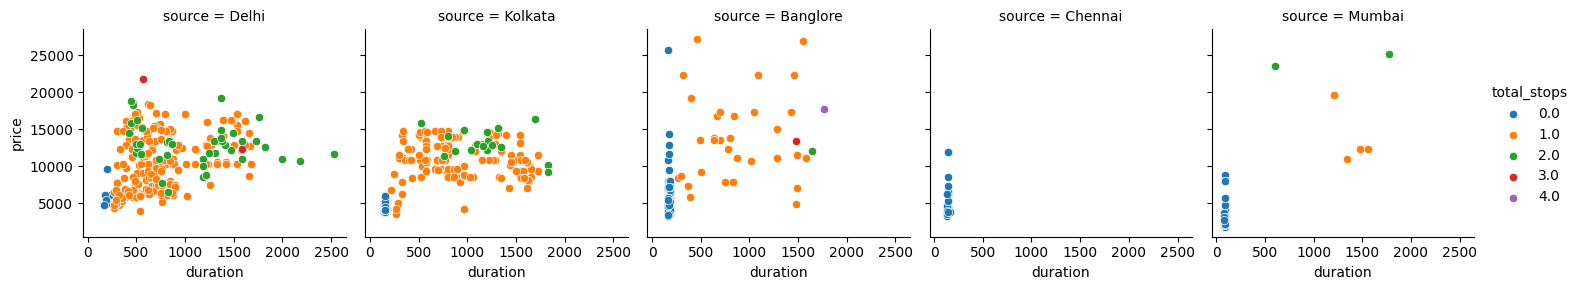

In [53]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

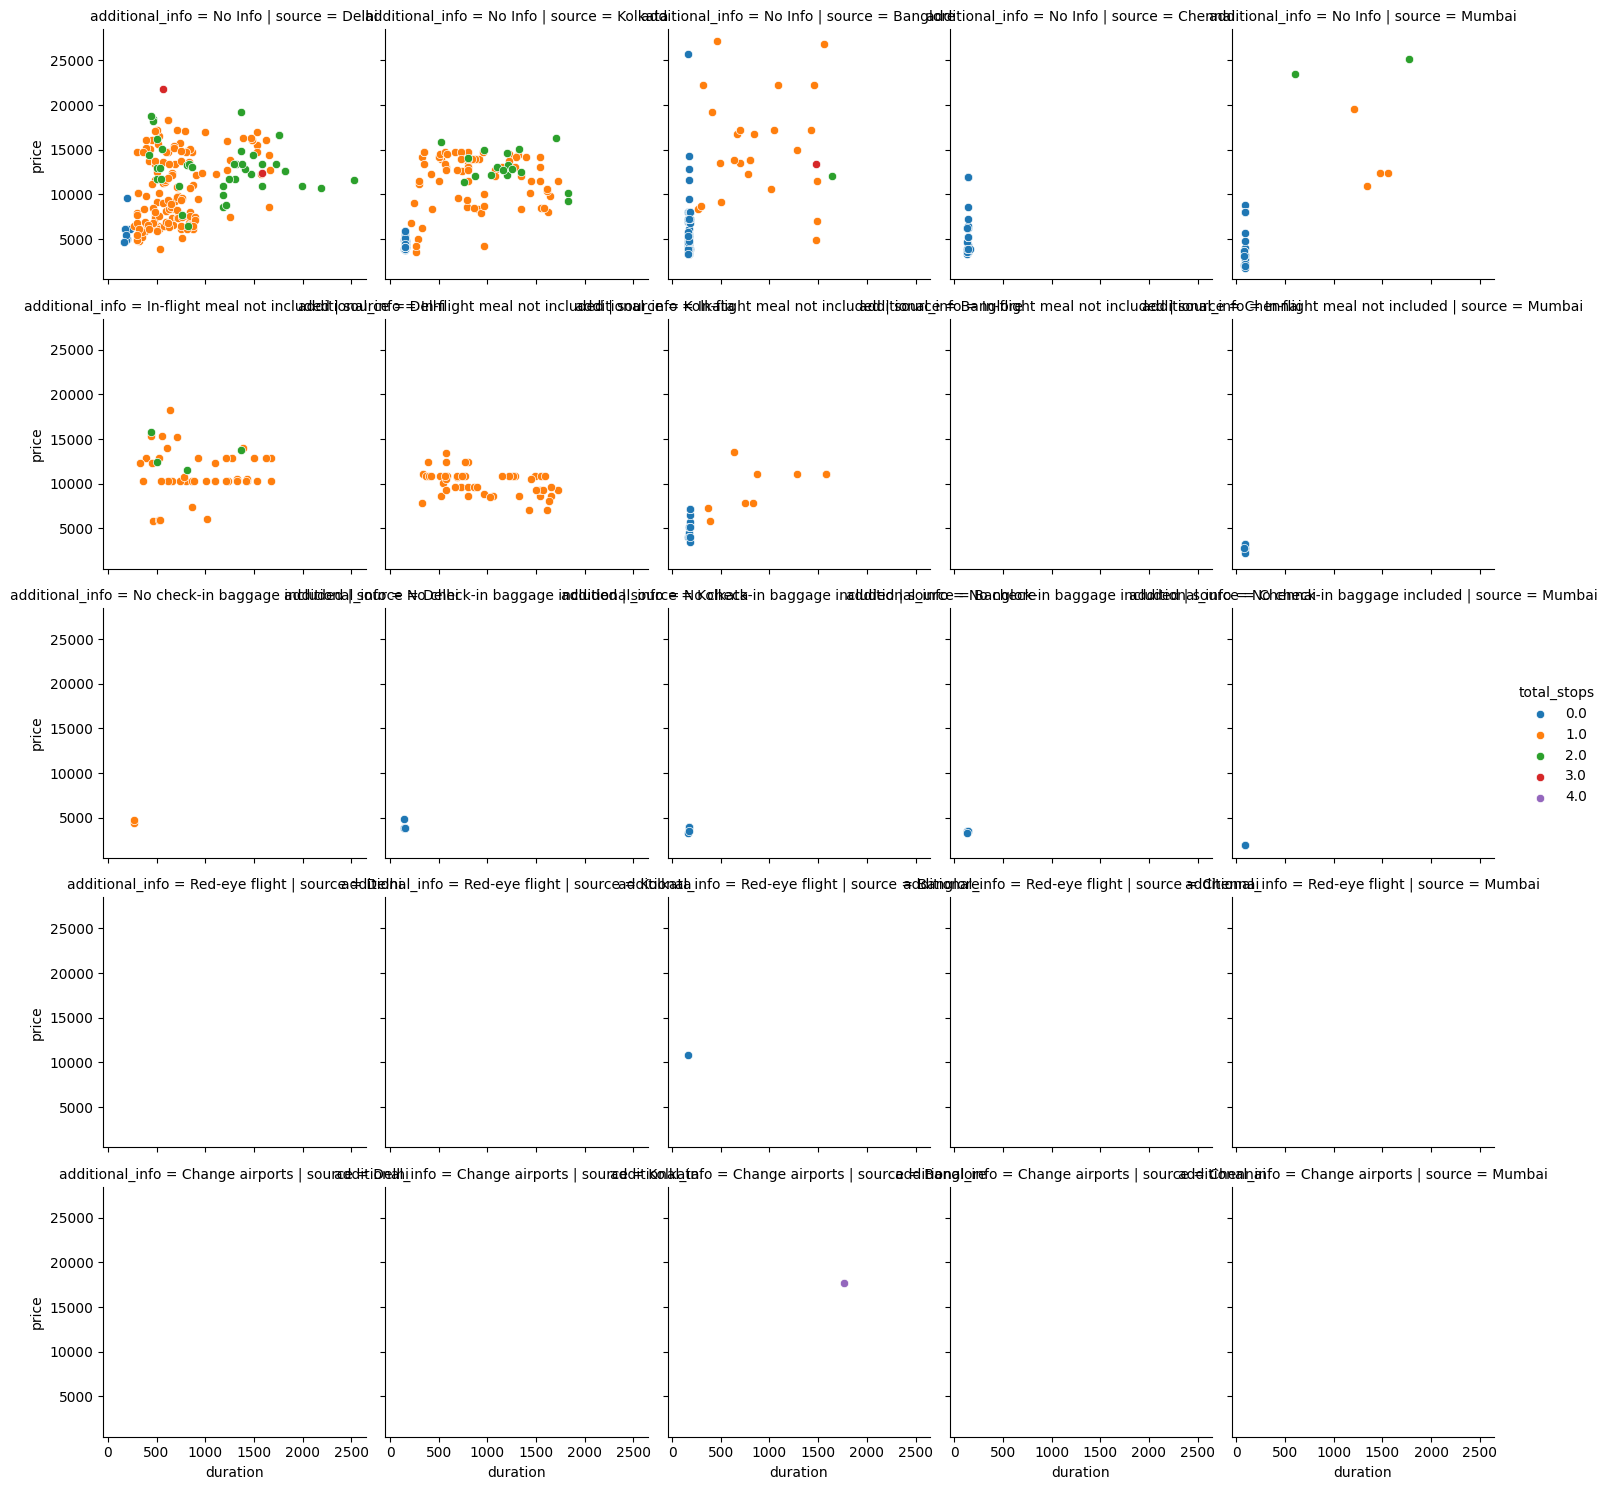

In [54]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [55]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -887.5
Upper Limit : 1932.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
278,Jet Airways,2019-03-27,Delhi,Cochin,2024-11-17 19:10:00,2024-11-17 04:25:00,1995,2.0,No Info,10929
183,Air India,2019-03-21,Delhi,Cochin,2024-11-17 06:50:00,2024-11-17 19:15:00,2185,2.0,No Info,10756
191,Jet Airways,2019-03-21,Delhi,Cochin,2024-11-17 10:20:00,2024-11-17 04:25:00,2525,2.0,No Info,11664


## Aditional_info

In [56]:
eda_helper_functions.cat_summary(train, "additional_info")

0                           No Info
1       In-flight meal not included
2                           No Info
3       In-flight meal not included
4      No check-in baggage included
                   ...             
635                         No Info
636                         No Info
637                         No Info
638                         No Info
639     In-flight meal not included
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,492


,count,percentage
category,,
No Info,492,0.768750
In-flight meal not included,126,0.196875
No check-in baggage included,20,0.031250
Red-eye flight,1,0.001563
Change airports,1,0.001563


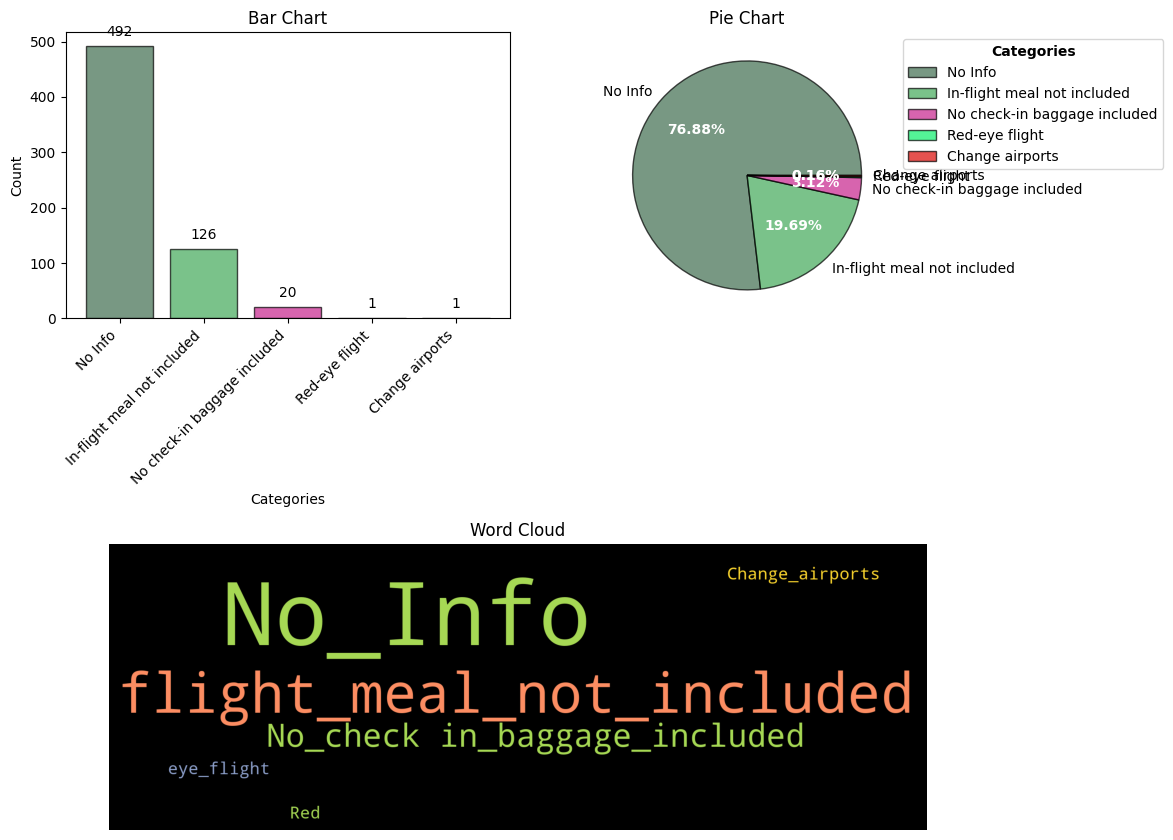

In [57]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

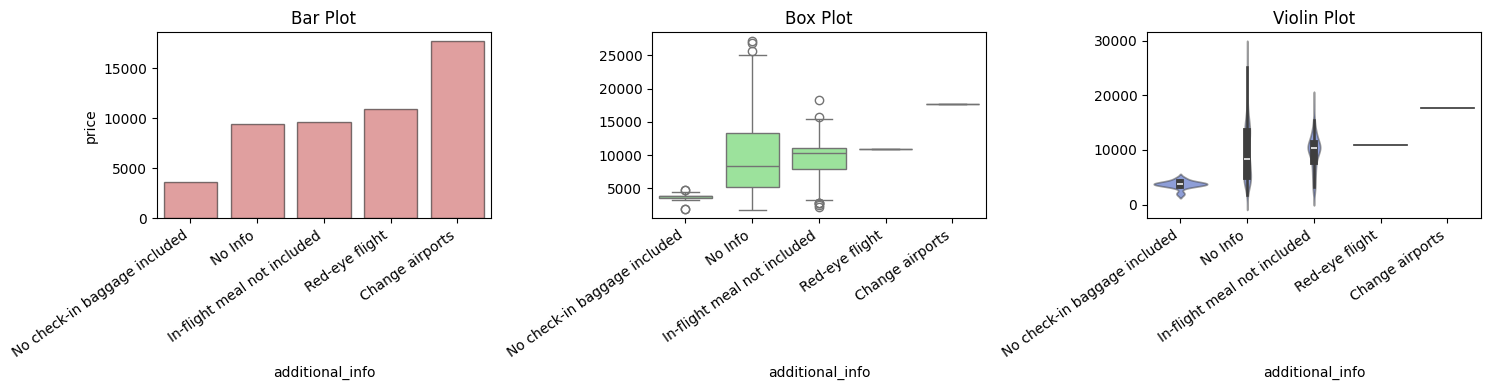

In [58]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

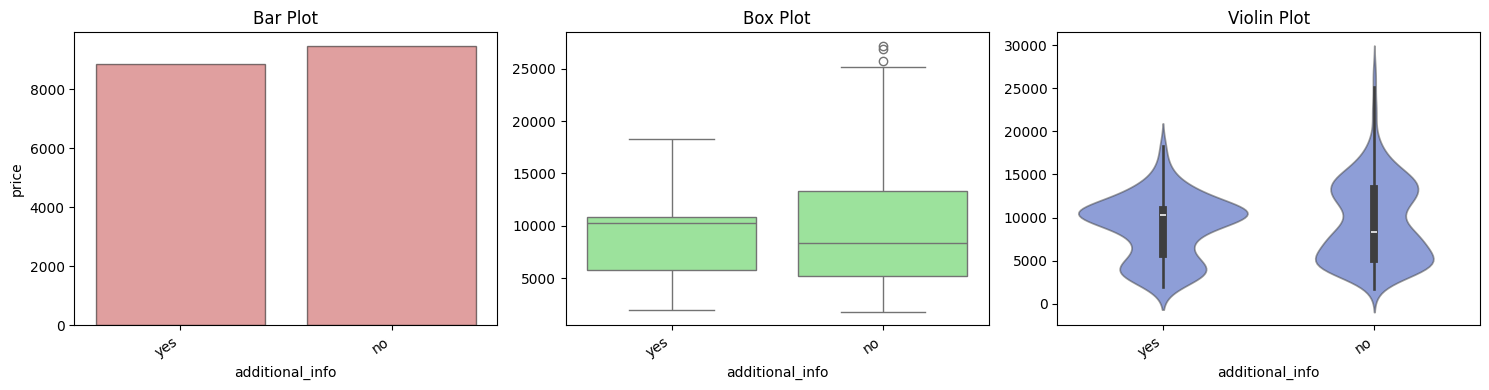

In [59]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

In [60]:
# automate_eda
# auto_viz, sweet_viz, D_tale,pandas profiling